# Humic Acid LOD Testing in DMSO
Created by Hans Gaensbauer for the MIT Climate and Sustainability Consortium </br>2-28-2023

In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from NMR import JEOL_parser as jeol

In [33]:
initial_concentration = 1

ns = 6
cutoff = 19
dlen = 39328
data = np.zeros((ns, dlen), dtype = np.complex128)
zero_point = 0
base_freq = 0

folder = "../data/nmr_data/"

for i in range(ns):
    filename = (folder + "HA-DMSO-%d_CARBON-2-1.jdf" % (i + 1))
    data[i] = jeol.get_1d_data(filename)

zero_point = jeol.get_header(filename)["Zero_Point"][0]
base_freq = jeol.get_header(filename)["Base_Freq"][0]
    
t = jeol.get_ruler(filename)[:]
np.shape(t)

(39328,)

<IPython.core.display.Javascript object>


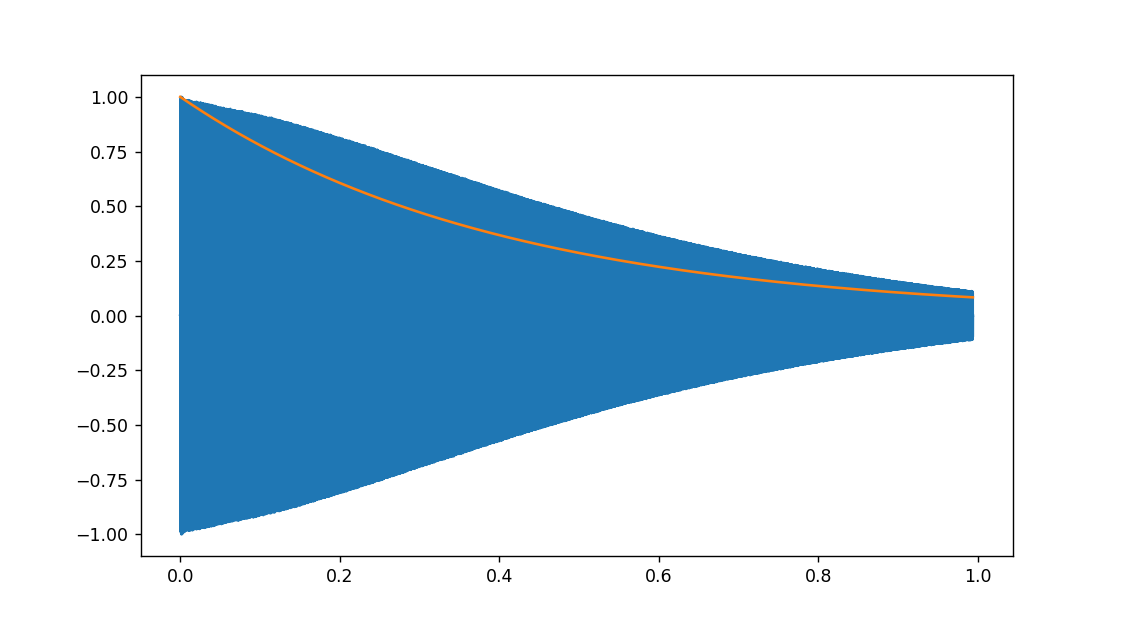

In [34]:
#Set the spectral width
sexp = np.exp(-2.5*(t-t[0]))

#plot the exponential with one of the FIDs
sexp_plot = plt.figure(figsize=(9,5))
plt.plot(t, np.real(data[0,:])/np.real(data[0,:]).max())
plt.plot(t, sexp)
plt.show()

<IPython.core.display.Javascript object>


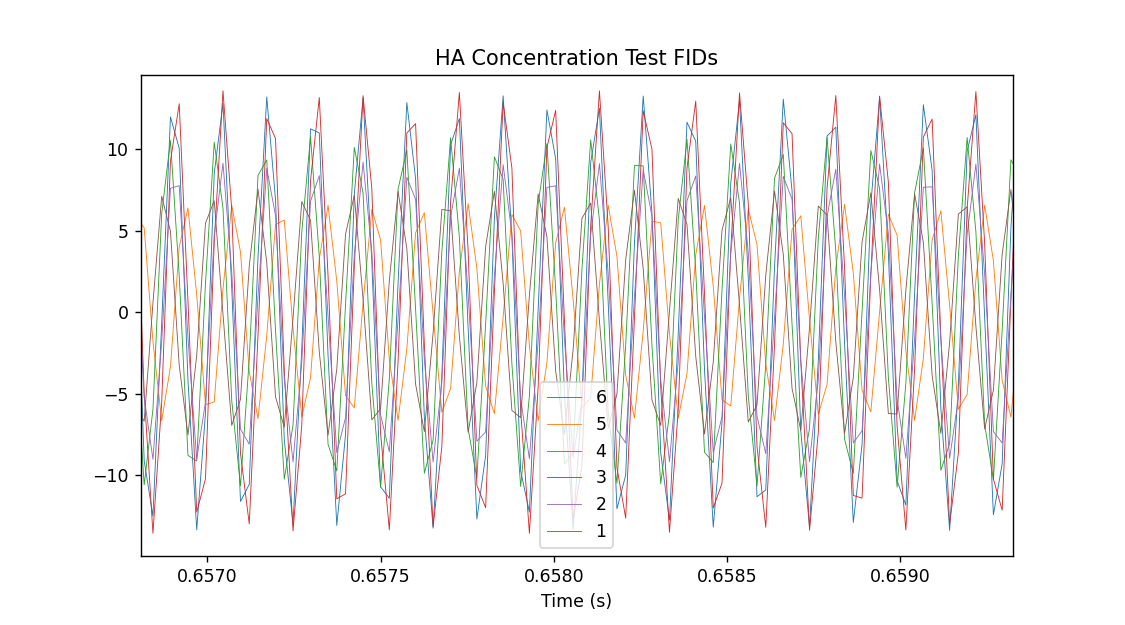

In [36]:
#plim = 128

#plot the FIDs
fid_plot = plt.figure(figsize=(9,5))
for i in range(ns):
    plt.plot(t[:], np.real(data[(ns-1-i)][:]), linewidth=0.5)
    
plt.legend([("%d" % (ns-i)) for i in range(ns)])
#plt.ylim([0.1, -0.1])
plt.title("HA Concentration Test FIDs")
plt.xlabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


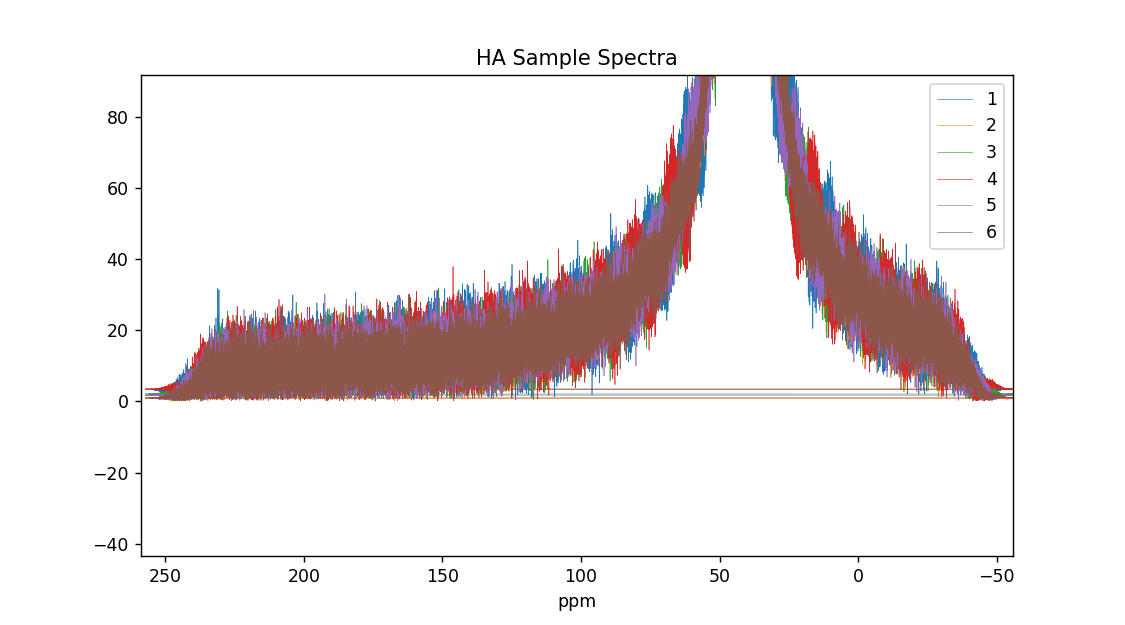

In [5]:
spectra = np.zeros((ns, dlen), dtype = np.complex128)
ppm = np.zeros((ns, dlen))

#Create Spectra
for i in range(ns):
    spectra[i] = np.fft.fft(data[i] * sexp)
    ppm[i] = (zero_point/(t[1]-t[0]) - np.fft.fftfreq(len(data[i]), t[1]-t[0]))/base_freq #Convert to ppm

spec_plot = plt.figure(figsize=(9,5))
for i in range(ns):
    plt.plot(ppm[(ns-1-i)], np.abs(spectra[(ns-1-i)]), linewidth=0.35)
    
plt.legend([("%d" % (i+1)) for i in range(ns)])
plt.gca().invert_xaxis()
plt.title("HA Sample Spectra")
plt.xlabel("ppm")
plt.show()

## Cauchy Distribution Fitting

<IPython.core.display.Javascript object>


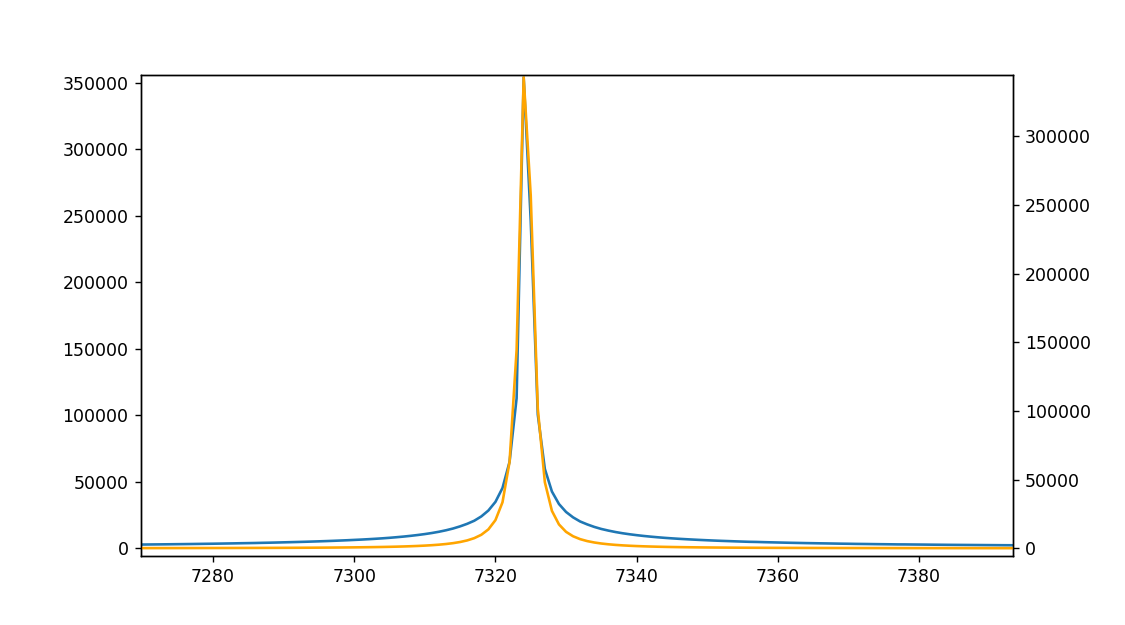

In [6]:
import scipy.optimize as opt
fitfig, ax1 = plt.subplots(figsize=(9,5))
ax1.plot(np.abs(spectra[0]))

def _mycauchy(x, loc, scale, mult):
    return st.cauchy.pdf(x, loc, scale)*mult

idx = range(len(spectra[0]))
popt, pcov = opt.curve_fit(_mycauchy, idx, np.abs(spectra[0]), p0=[7360, 1, 100000])

ax2 = ax1.twinx()
ax2.plot(_mycauchy(idx, popt[0], popt[1], popt[2]), color='orange')
plt.show()

<IPython.core.display.Javascript object>


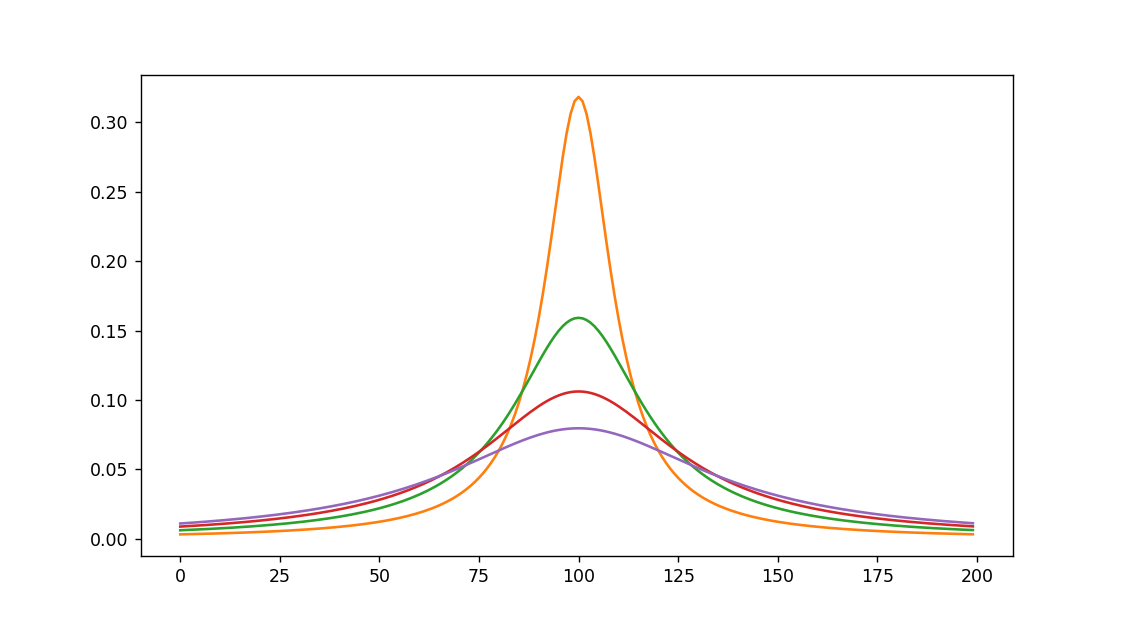

C:\Users\hansg\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [7]:
scalefig = plt.figure(figsize = (9,5))
idx = np.arange(-10,10,0.1)
for i in range(5):
    plt.plot(st.cauchy.pdf(idx, 0, i))
plt.show()

<IPython.core.display.Javascript object>


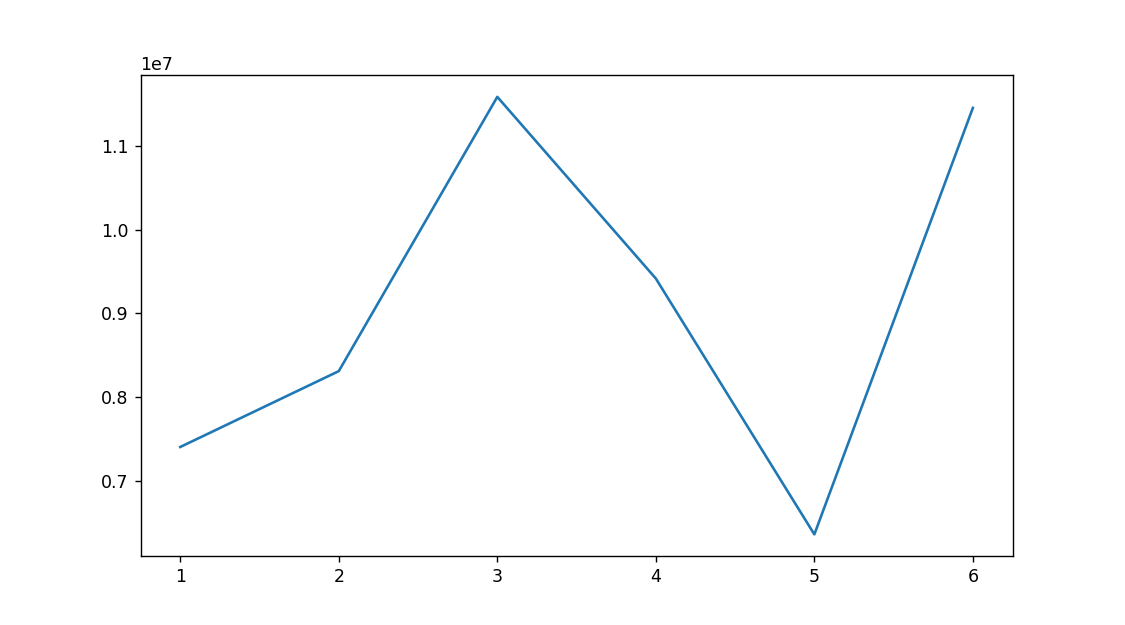

In [9]:
#integrate
pwr = np.sum(np.abs(np.multiply(data, data)), 1)
np.shape(pwr)

pwrfig = plt.figure(figsize=(9,5))
plt.plot(range(1,7), pwr)
plt.show()